In [3]:
#importing the necessary libraries and reading the dataset
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
import seaborn as sns 
import sys
import time 
plt.style.use('ggplot')
df = pd.read_csv('/home/sid27/Postman Task2/Smoking_drinking_classification/smoking_driking_dataset_Ver01.csv')

# EDA  
### Data understanding    

In [4]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,N


In [5]:
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [6]:
df.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [7]:
df.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left             int64
hear_right            int64
SBP                   int64
DBP                   int64
BLDS                  int64
tot_chole             int64
HDL_chole             int64
LDL_chole             int64
triglyceride          int64
hemoglobin          float64
urine_protein         int64
serum_creatinine    float64
SGOT_AST              int64
SGOT_ALT              int64
gamma_GTP             int64
SMK_stat_type_cd      int64
DRK_YN               object
dtype: object

In [8]:
#check for missing values
df.isna().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

so we can see there are no missing values in the data. 

In [9]:
#check for duplicates
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
991341    False
991342    False
991343    False
991344    False
991345    False
Length: 991346, dtype: bool

No duplicates.

In [10]:
#converting 'sex','DRK_YN' and 'SMK_stat_type_cd' columns to numerical values. 
df['sex_n'] = df['sex'].replace(['Female', 'Male'], [1, 2])
df['drk'] = df['DRK_YN'].replace(['N', 'Y'], [1, 2])
df['smoking'] = df['SMK_stat_type_cd'].replace([1,2,3], ['No', 'Quit', 'Yes'])
df.rename(columns={'SMK_stat_type_cd': 'smoking_ynq'}, inplace=True)



### Data preparation 

We could merge the height and weight columns to give BMI. 

In [11]:
df['BMI'] = df['weight']/(df['height']**2)
df_n = df.drop(['sex' ], axis=1)
df_n.head()


,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,smoking_ynq,DRK_YN,sex_n,drk,smoking,BMI
0,35,170,75,90.0,1.0,1.0,1,1,120,80,...,1.0,21,35,40,1,Y,2,2,No,0.002595
1,30,180,80,89.0,0.9,1.2,1,1,130,82,...,0.9,20,36,27,3,N,2,1,Yes,0.002469
2,40,165,75,91.0,1.2,1.5,1,1,120,70,...,0.9,47,32,68,1,N,2,1,No,0.002755
3,50,175,80,91.0,1.5,1.2,1,1,145,87,...,1.1,29,34,18,1,N,2,1,No,0.002612
4,50,165,60,80.0,1.0,1.2,1,1,138,82,...,0.8,19,12,25,1,N,2,1,No,0.002204


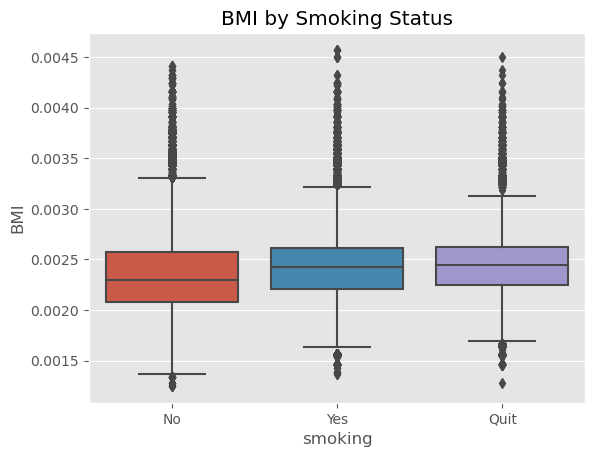

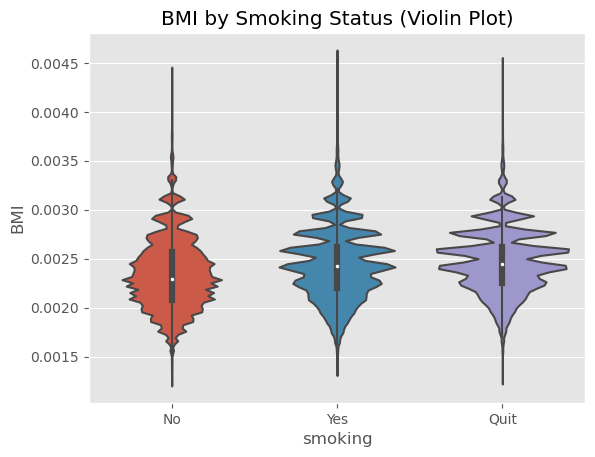

In [12]:
#Inspecting whether BMI is better related to the target variables and thus could 
#it be a more useful feature than height and weight. 

# Box plot of BMI by Smoking status
sns.boxplot(x='smoking', y='BMI', data=df_n)
plt.title('BMI by Smoking Status')
plt.show()

# Violin plot of BMI by Smoking status
sns.violinplot(x='smoking', y='BMI', data=df_n)
plt.title('BMI by Smoking Status (Violin Plot)')
plt.show()

There may be a slight hint of the BMI of past/ present smokers sometimes more than non-smokers. We'll further judge the usefulness of the BMI feature as compared to weight and height thoroughly later using correlation matrix.

Weight and smoking history.

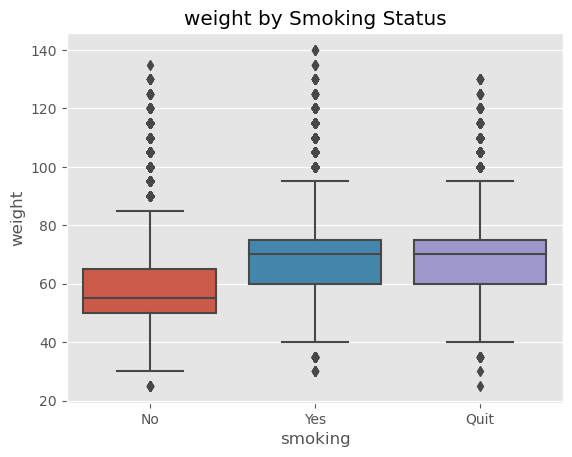

In [13]:
sns.boxplot(x='smoking', y='weight', data=df_n)
plt.title('weight by Smoking Status')
plt.show()


We can see that both present and former smokers seem to weigh haevier than those who do not smoke. Let's look at the correlation of weight and drinking behaviour. 

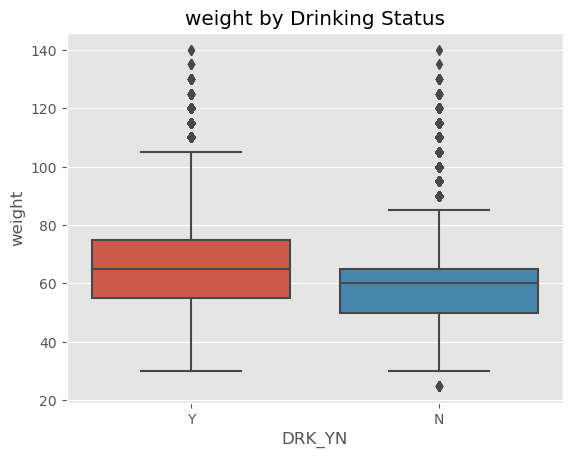

In [14]:
sns.boxplot(x='DRK_YN', y='weight', data=df_n)
plt.title('weight by Drinking Status')
plt.show()

 Its quite clear from the plot that a good fraction of individuals who drink have more weight than those who don't.

Hemoglobin serves as a critical health indicator by measuring the oxygen-carrying capacity of red blood cells, providing insight into overall blood and circulatory health. Let's plot hemoglobin against smoking habits.

In [15]:
non_smokers = df[df['smoking_ynq'] == 1.0]
ex_smokers = df[df['smoking_ynq'] == 2.0]
smokers = df[df['smoking_ynq'] == 3.0]

Text(0.5, 1.0, 'Smokers')

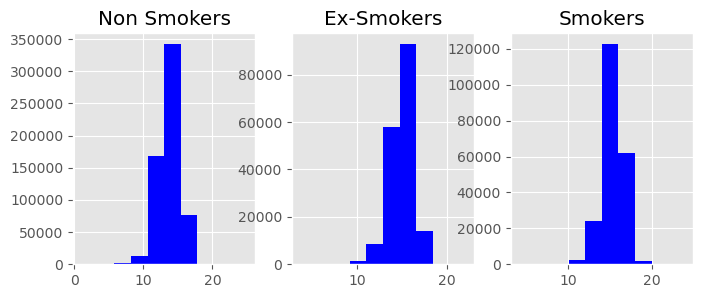

In [16]:
fig,axes = plt.subplots (nrows=1,ncols=3,figsize =(8,3))


axes[0].hist(non_smokers['hemoglobin'],color = 'blue')
axes[0].set_title('Non Smokers')
axes[1].hist(ex_smokers['hemoglobin'],color = 'blue')
axes[1].set_title('Ex-Smokers')
axes[2].hist(smokers['hemoglobin'],color = 'blue')
axes[2].set_title('Smokers')

This clearly shows there is a rather significant correlation between smoking habits and hemoglobin. Although it may not be obvious from the plot since the bars appear to be of the same height. 

Text(0.5, 1.0, 'Hemoglobin level - Smokers vs Non - Smokers')

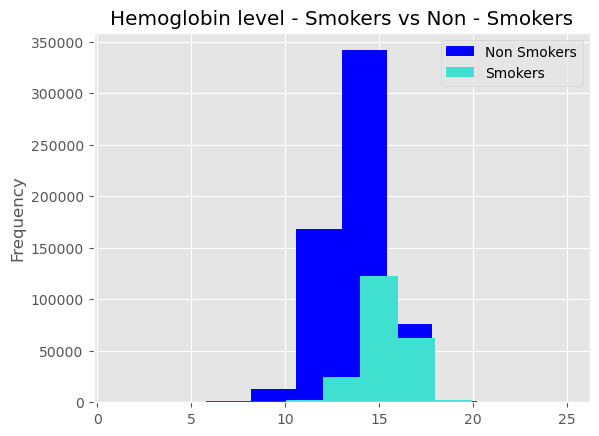

In [17]:
non_smokers['hemoglobin'].plot.hist(label='Non Smokers',legend=True,color='blue')
smokers['hemoglobin'].plot.hist(label ='Smokers',legend=True,color='turquoise')
plt.title('Hemoglobin level - Smokers vs Non - Smokers')

From this plot its quite obvious that non smokers tend to have higher hemoglobin levels than those who smoke or used to do so. 

Now identifying and removing outliers before we go ahead with feature extraction. 
 

In [18]:
#Making box plots to get a qualitative feel for the outliers. 

def plot_boxplots(dataframe):
    num_columns = dataframe.select_dtypes(include=['number']).columns
    num_plots = len(num_columns)
    rows, cols = divmod(num_plots, 2)
    if cols > 0:
        cols += 1

    fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(20, 20))

    for i, column in enumerate(num_columns):
        if i < rows * 2:  # Ensure not to access non-existent subplots
            row, col = divmod(i, 2)
            ax = axes[row, col]
            sns.boxplot(x=dataframe[column], ax=ax)
            ax.set_title(f"Boxplot of {column}")
            ax.set_xlabel(column)

    plt.tight_layout()
    plt.show()


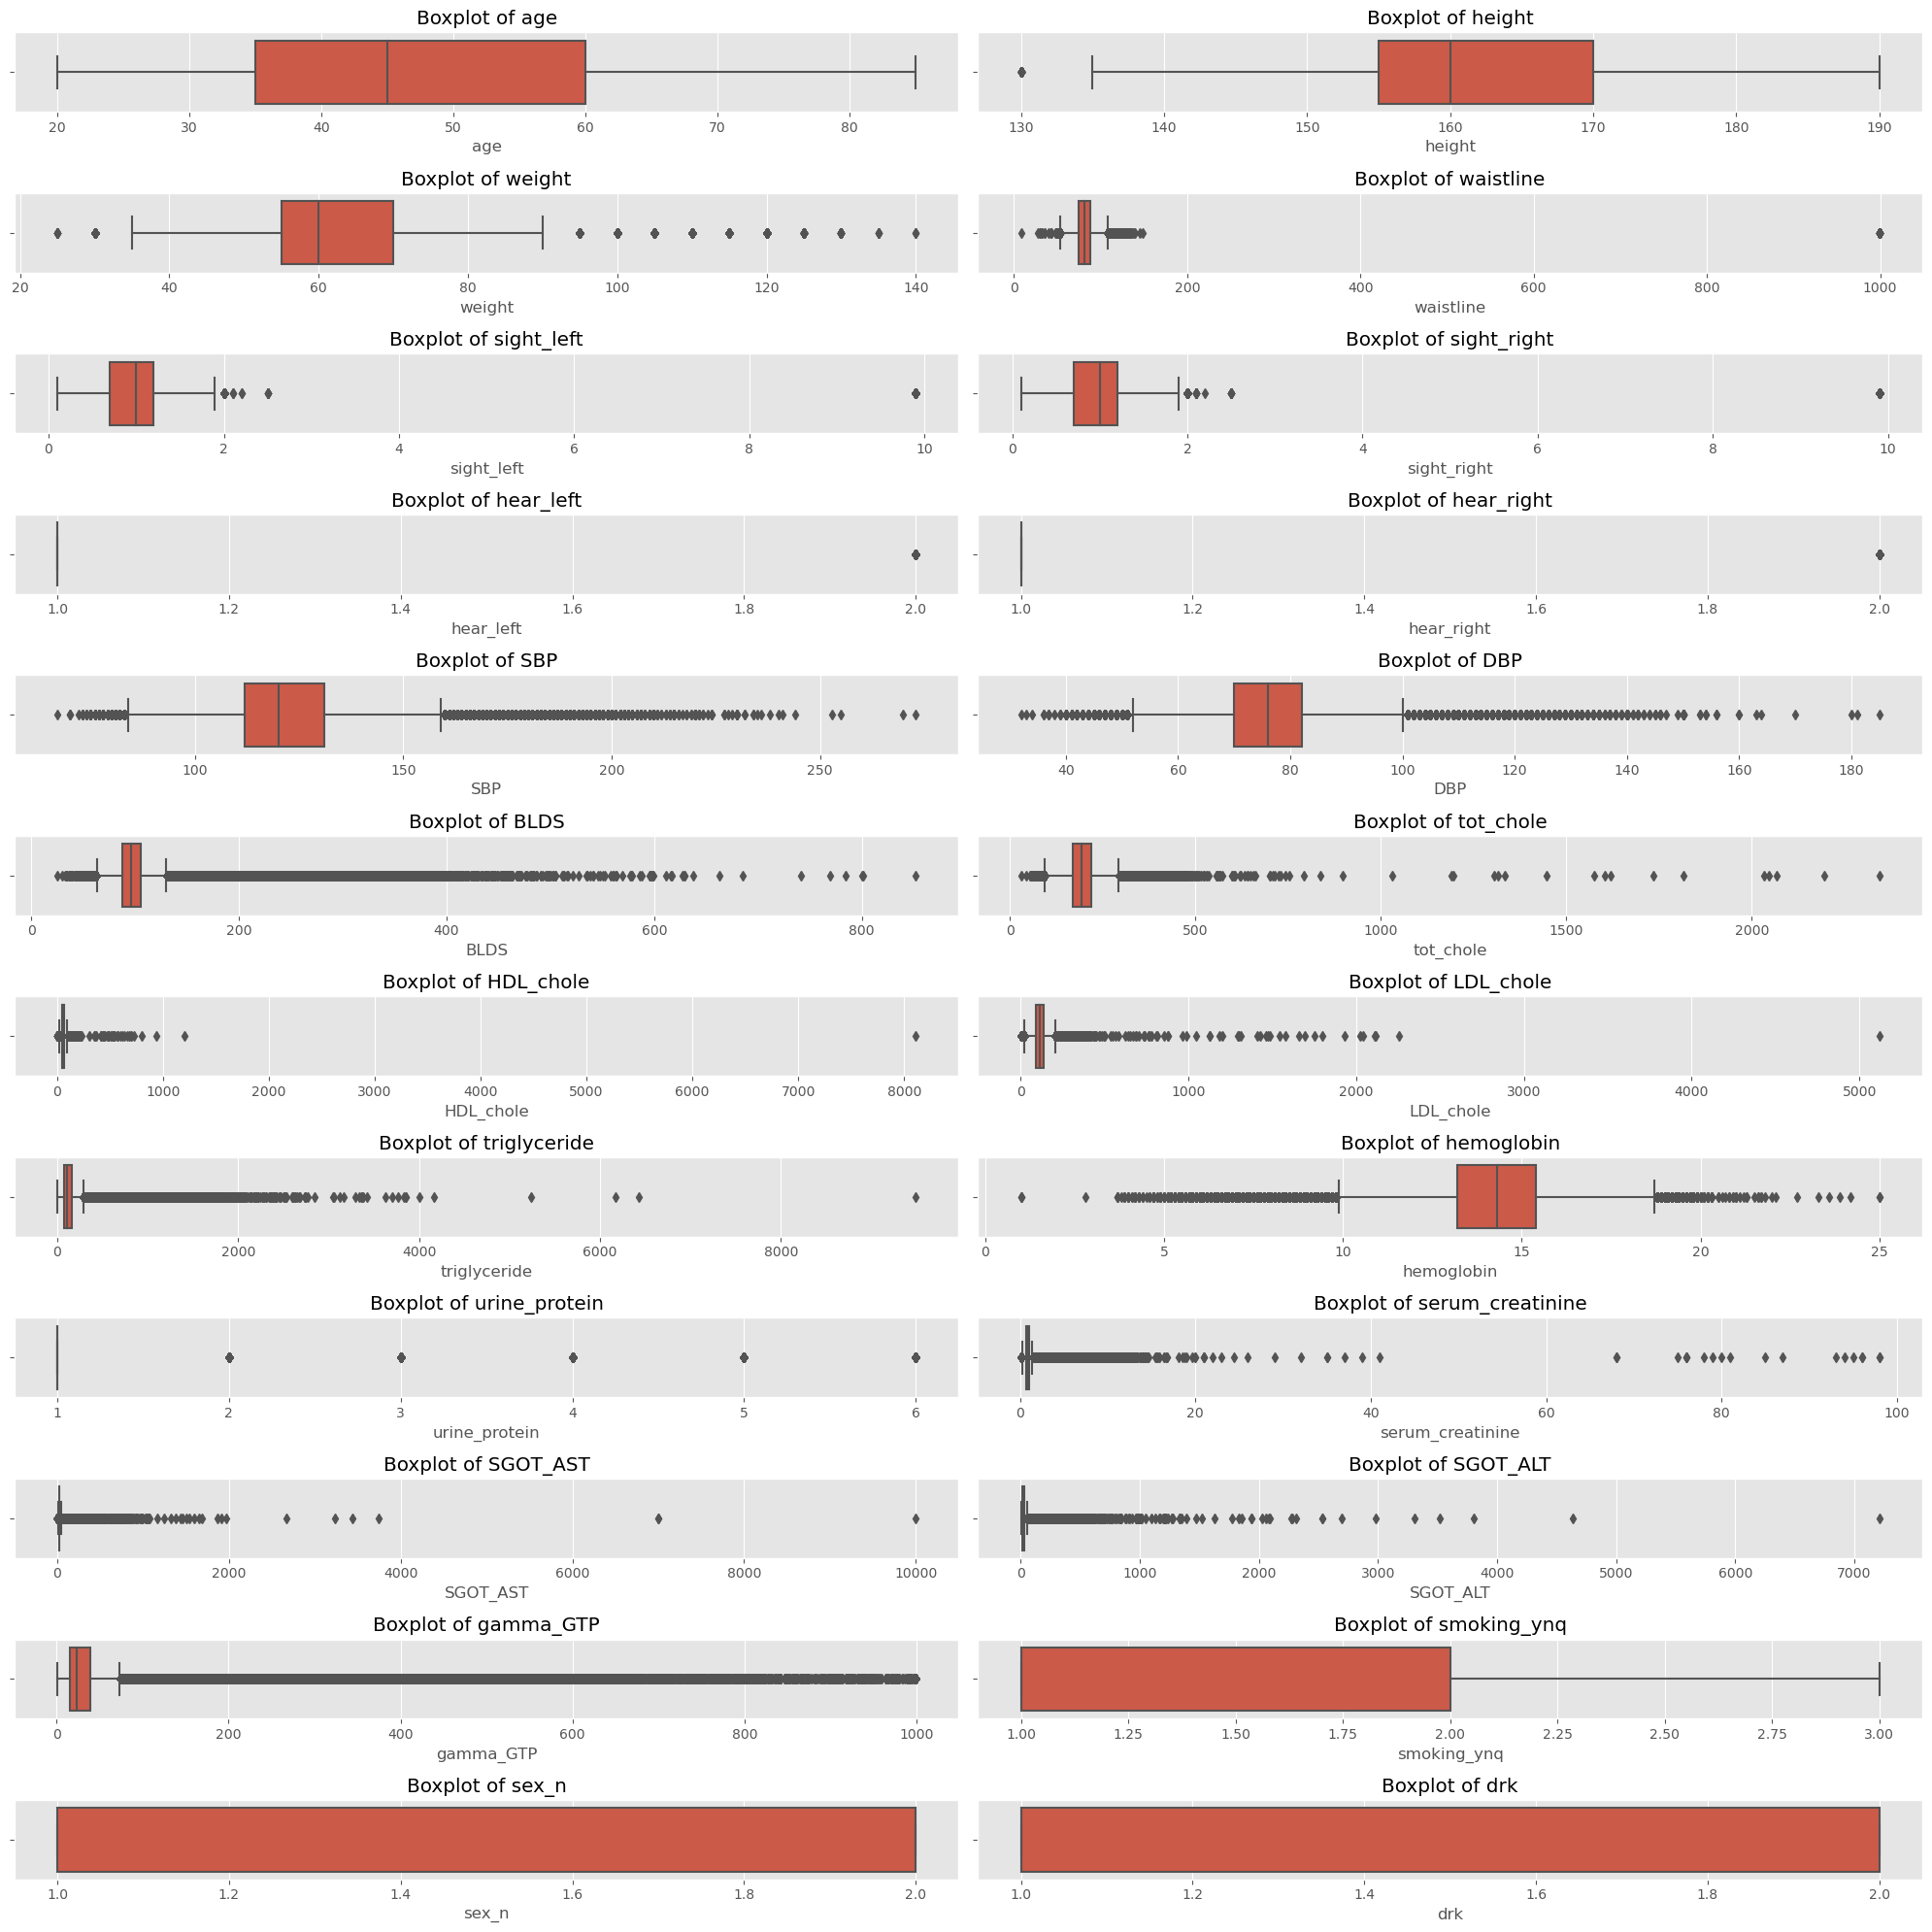

In [19]:
plot_boxplots(df)

In [20]:
#Using the interquartile range (IQR) method to determine the outlier boundary and replace 
#the values in the columns that go beyond these boundaries with the nearest boundary values.

def replace_outliers_with_iqr(df, columns, multiplier=1.5):
    # Create a copy of the original DataFrame to store the modified data
    df_outrem = df.copy()

    for column in columns:
        # Calculate the first and third quartiles
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)

        # Calculate the interquartile range (IQR)
        iqr = q3 - q1

        # Calculate the lower and upper bounds
        lower_bound = q1 - multiplier * iqr
        upper_bound = q3 + multiplier * iqr

        # Replace values outside the range [lower_bound, upper_bound] with boundary values
        df_outrem[column] = df_outrem[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    return df_outrem


In [21]:
df_n.columns

Index(['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right',
       'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole',
       'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein',
       'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'smoking_ynq',
       'DRK_YN', 'sex_n', 'drk', 'smoking', 'BMI'],
      dtype='object')

In [22]:
columns_to_process = ['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right',
       'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole',
       'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein',
       'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'smoking_ynq',
       #'DRK_YN',
       'sex_n', 'drk', #'smoking', 
       'BMI']

df_outrem = replace_outliers_with_iqr(df_n, columns_to_process)

print(df_outrem)

        age  height  weight  waistline  sight_left  sight_right  hear_left  \
0        35   170.0    75.0       90.0         1.0          1.0        1.0   
1        30   180.0    80.0       89.0         0.9          1.2        1.0   
2        40   165.0    75.0       91.0         1.2          1.5        1.0   
3        50   175.0    80.0       91.0         1.5          1.2        1.0   
4        50   165.0    60.0       80.0         1.0          1.2        1.0   
...     ...     ...     ...        ...         ...          ...        ...   
991341   45   175.0    80.0       92.1         1.5          1.5        1.0   
991342   35   170.0    75.0       86.0         1.0          1.5        1.0   
991343   40   155.0    50.0       68.0         1.0          0.7        1.0   
991344   25   175.0    60.0       72.0         1.5          1.0        1.0   
991345   50   160.0    70.0       90.5         1.0          1.5        1.0   

        hear_right    SBP   DBP  ...  serum_creatinine  SGOT_AS

In [23]:
#Checking feature relatioships in the data with outliers removed.

#plotting the correlation matrix
corrmat = df_outrem.corr()
corrmat

/tmp/ipykernel_41855/251727674.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_outrem.corr()


,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,smoking_ynq,sex_n,drk,BMI
age,1.000000,-0.398478,-0.191550,0.165774,-0.371506,-0.364276,NaN,NaN,0.267935,0.112605,...,-0.177219,NaN,0.031715,0.166595,0.009338,0.019198,-0.126031,-0.083225,-0.284587,0.062439
height,-0.398478,1.000000,0.673730,0.327583,0.270251,0.271448,NaN,NaN,0.038135,0.109498,...,0.540577,NaN,0.416775,0.078911,0.232869,0.279977,0.467336,0.722806,0.374573,0.114287
weight,-0.191550,0.673730,1.000000,0.785961,0.171186,0.172714,NaN,NaN,0.255731,0.279190,...,0.512394,NaN,0.381140,0.222235,0.434796,0.411929,0.370683,0.590565,0.268097,0.805909
waistline,0.165774,0.327583,0.785961,1.000000,-0.009042,-0.005225,NaN,NaN,0.347736,0.305578,...,0.373177,NaN,0.294215,0.277835,0.431992,0.413485,0.258176,0.433008,0.120376,0.800834
sight_left,-0.371506,0.270251,0.171186,-0.009042,1.000000,0.696678,NaN,NaN,-0.088673,-0.010108,...,0.169204,NaN,0.071508,-0.028884,0.052451,0.049634,0.117520,0.168069,0.158083,0.014028
sight_right,-0.364276,0.271448,0.172714,-0.005225,0.696678,1.000000,NaN,NaN,-0.084609,-0.006976,...,0.172102,NaN,0.075602,-0.025931,0.054497,0.052917,0.118903,0.173434,0.156431,0.015067
hear_left,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hear_right,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SBP,0.267935,0.038135,0.255731,0.347736,-0.088673,-0.084609,NaN,NaN,1.000000,0.739200,...,0.172249,NaN,0.128041,0.190645,0.205080,0.245721,0.087216,0.180828,0.034368,0.315496
DBP,0.112605,0.109498,0.279190,0.305578,-0.010108,-0.006976,NaN,NaN,0.739200,1.000000,...,0.245883,NaN,0.130686,0.177772,0.219106,0.268801,0.127605,0.201692,0.100949,0.288467


In [24]:
df_outrem.head()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,smoking_ynq,DRK_YN,sex_n,drk,smoking,BMI
0,35,170.0,75.0,90.0,1.0,1.0,1.0,1.0,120.0,80.0,...,1.0,21.0,35.0,40.0,1,Y,2,2,No,0.002595
1,30,180.0,80.0,89.0,0.9,1.2,1.0,1.0,130.0,82.0,...,0.9,20.0,36.0,27.0,3,N,2,1,Yes,0.002469
2,40,165.0,75.0,91.0,1.2,1.5,1.0,1.0,120.0,70.0,...,0.9,41.5,32.0,68.0,1,N,2,1,No,0.002755
3,50,175.0,80.0,91.0,1.5,1.2,1.0,1.0,145.0,87.0,...,1.1,29.0,34.0,18.0,1,N,2,1,No,0.002612
4,50,165.0,60.0,80.0,1.0,1.2,1.0,1.0,138.0,82.0,...,0.8,19.0,12.0,25.0,1,N,2,1,No,0.002204


Making a heat map.

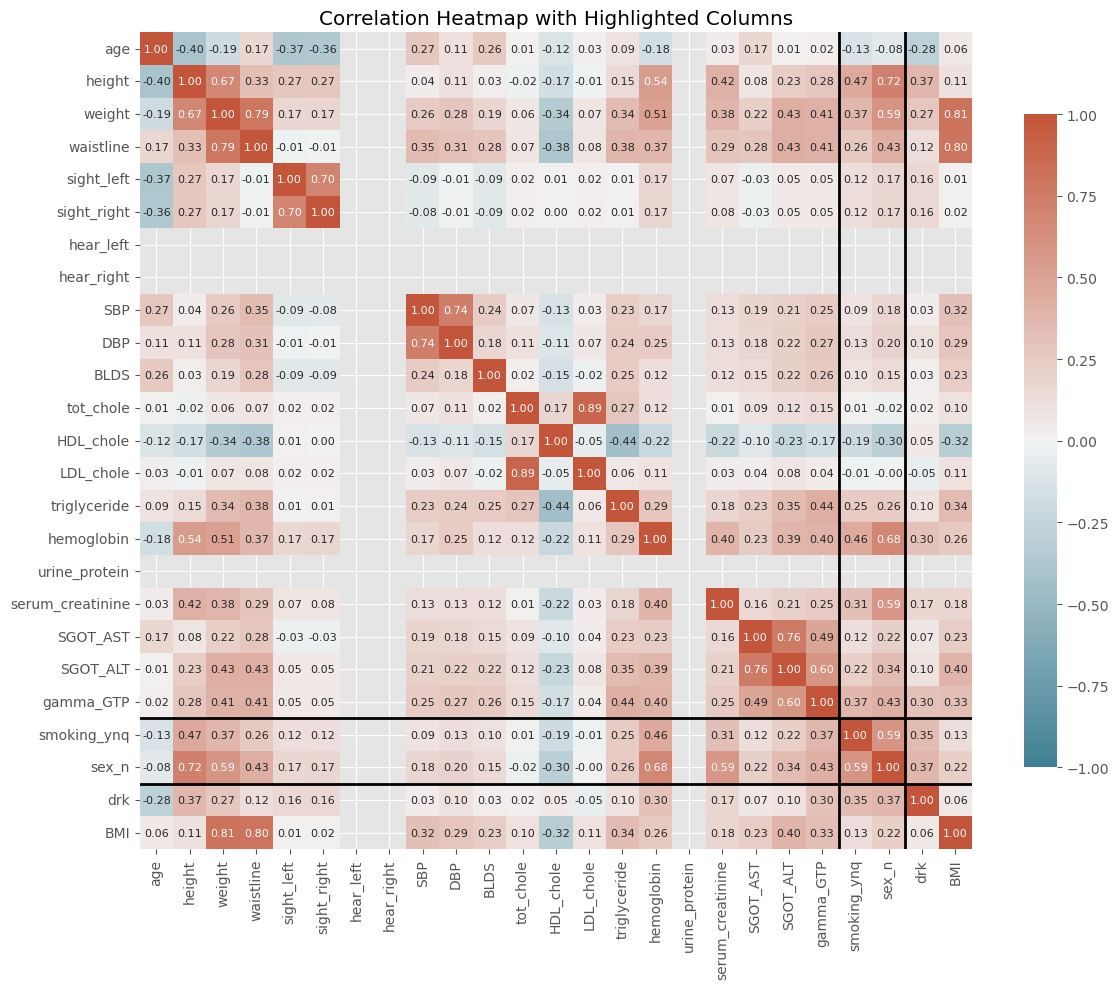

In [25]:
# Specify columns to highlight
highlight_cols = ['smoking_ynq', 'drk']

# Create a larger heatmap with adjusted font size
plt.figure(figsize=(12, 10))

# Define custom color palette for the heatmap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plot the heatmap with custom colors for highlighted columns
sns.heatmap(corrmat, annot=True, cmap=cmap, center=0, fmt=".2f", annot_kws={"size": 8},
            cbar_kws={"shrink": 0.8}, vmin=-1, vmax=1)

# Highlight columns by drawing lines around them
for i in range(len(corrmat.columns)):
    if corrmat.columns[i] in highlight_cols:
        plt.axhline(i, color='k', linewidth=2)
        plt.axvline(i, color='k', linewidth=2)

plt.title('Correlation Heatmap with Highlighted Columns')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

Note that columns which are almost entirely constant do not show up on the correlation matrix, as they do not have a rigorous correlation with the other features. 

Now let's extract features showing strong correlation.

In [26]:
#Extracting features based on the correlation matrix.

#We'll extract correlation columns where the correlation is above 0.1 and below -0.1 for 
#the drinkers and the smokers

correlation_threshold = 0.1
DRK_features = []
for feature in corrmat.columns:
    if feature != 'drk' and (corrmat[feature]['drk'] > correlation_threshold or
                                corrmat[feature]['drk'] < -correlation_threshold):
        DRK_features.append(feature)

print("Correlated features with 'drk':")
print(DRK_features)

Correlated features with 'drk':
['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'DBP', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_ALT', 'gamma_GTP', 'smoking_ynq', 'sex_n']


In [27]:
correlation_threshold = 0.1
SMK_features = []
for feature in corrmat.columns:
    if feature != 'smoking_ynq' and (corrmat[feature]['smoking_ynq'] > correlation_threshold or
                                corrmat[feature]['smoking_ynq'] < -correlation_threshold):
        SMK_features.append(feature)

print("Correlated features with 'smoking_ynq':")
print(SMK_features)

Correlated features with 'smoking_ynq':
['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'DBP', 'HDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'sex_n', 'drk', 'BMI']


In [28]:
#Note that here 'height', 'weight' as well as 'BMI' have been selected. This can be problematic
#since height/weight and BMI are inherently related to each other, this could cause multicolinearity
#in the model. So we won't consider BMI. 
SMK_features = ['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'DBP', 'HDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'sex_n', 'drk']

# Model training

1. Let's start with basic logistic regression for both drinking and smoking. Starting with drinking habits.

In [29]:
#Choosing the features and target variables
X_drink = df_outrem[DRK_features]
y_drink = df_outrem['DRK_YN']

#split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X_drink, y_drink, test_size=0.2, random_state=40)

#Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a logistic regression model
model = LogisticRegression(max_iter=1000, fit_intercept=True)  
t0 = time.time()
model.fit(X_train_scaled, y_train)
t1 = time.time()

# Predict the target variable on the test set
t2 = time.time()
y_pred = model.predict(X_test_scaled)
t3 = time.time()
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Training time =", t1-t0)
print("Prediction time = ", t3 - t2)



Accuracy: 0.7199021536288899
Training time = 1.7376658916473389
Prediction time =  0.005011796951293945


So we have got an accuracy of 0.7199 which seems quite nice. 
Let's now try Logistic Regression with Regularisation. The model is quite quick comparatively and usually gives results within 3 seconds on my system. 

In [30]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_drink, y_drink, test_size=0.2, random_state=40)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize a logistic regression model
regularization_strength = 1.0  # can be adjusted
model = LogisticRegression(max_iter=1000, fit_intercept=True, C=regularization_strength, penalty='l2')  # Use L2 regularization

t0 = time.time()
model.fit(X_train_scaled, y_train)
t1 = time.time()

# Predict the target variable on the test set
t2 = time.time()
y_pred = model.predict(X_test_scaled)
t3 = time.time()

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Training time =", t1-t0)
print("Prediction time = ", t3 - t2)

Accuracy: 0.7199021536288899
Training time = 1.8068287372589111
Prediction time =  0.0051517486572265625


We see that there's no improvement in accuracy, indicating that the model was not overfitting to begin with. 

Now let's look at Smoking using these two. 

In [31]:
X_smoke = df_outrem[SMK_features]
y_smoke = df_outrem['smoking'] 

X_train, X_test, y_train, y_test = train_test_split(X_smoke, y_smoke, test_size=0.2, random_state=40)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=40)
t0 = time.time()
model.fit(X_train_scaled, y_train)
t1 = time.time()

# Predict the target variable on the test set
t2 = time.time()
y_pred = model.predict(X_test_scaled)
t3 = time.time()


# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Training time =", t1-t0)
print("Prediction time = ", t3 - t2)


Accuracy: 0.6962626721137842
Training time = 4.364740610122681
Prediction time =  0.014562368392944336


An accuracy of 0.696. And now with a regularised version. 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_smoke, y_smoke, test_size=0.2, random_state=40)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=40, C = 1, penalty = 'l2')
t0 = time.time()
model.fit(X_train_scaled, y_train)
t1 = time.time()

# Predict the target variable on the test set
t2 = time.time()
y_pred = model.predict(X_test_scaled)
t3 = time.time()

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Training time =", t1-t0)
print("Prediction time = ", t3 - t2)


Accuracy: 0.6962626721137842
Training time = 4.137248277664185
Prediction time =  0.013453006744384766


Almost identical, not much to gain here. This even takes more time than the last.

2. Now let's use a decision tree

In [33]:
# using a decision tree for drinking
# Define features and target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_drink, y_drink, test_size=0.2, random_state=40)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a decision tree classifier without specifying a maximum depth
model = DecisionTreeClassifier(random_state=40, max_depth=9)
t0 = time.time()
model.fit(X_train_scaled, y_train)
t1 = time.time()

# Predict the target variable on the test set
t2 = time.time()
y_pred = model.predict(X_test_scaled)
t3 = time.time()
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Training time =", t1-t0)
print("Prediction time = ", t3 - t2)


Accuracy: 0.7226105815302365
Training time = 4.218145132064819
Prediction time =  0.028591394424438477


I had to play around with the max depth a bit to arrive at an optimum value, giving our best accuracy yet of 0.7226. Alright, now let's try to optimise the decision tree further. 

In [34]:
# Define the hyperparameters and their search space
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dtree = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 5}


In [35]:
# Create a decision tree classifier with the best hyperparameters

best_dtree = DecisionTreeClassifier(
    max_depth=9,
    min_samples_split=2,
    min_samples_leaf=4,
    random_state=40  # Set a random seed for reproducibility
)

# Train the model on the training data
t0 = time.time()
best_dtree.fit(X_train_scaled, y_train)
t1 = time.time()
# Predict the target variable on the test set
t2 = time.time()
y_pred = best_dtree.predict(X_test_scaled)
t3 = time.time()
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Training time =", t1-t0)
print("Prediction time = ", t3 - t2)

Accuracy: 0.7225702325112221
Training time = 5.09984827041626
Prediction time =  0.027103900909423828


So even after using grid search to find optimised parameters, our accuracy here is not significantly different than what we got with just playing around with the max depth. 

In [36]:
#Now let's come to smoking. 

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smoke, y_smoke, test_size=0.2, random_state=40)

# Initialize and train a decision tree classifier with a specific max depth
max_tree_depth = 10  # Adjust the depth as needed
model = DecisionTreeClassifier(max_depth=max_tree_depth, random_state=40)
t0 = time.time()
model.fit(X_train, y_train)
t1 = time.time()
# Predict the target variable on the test set
t2 = time.time()
y_pred = model.predict(X_test)
t3 = time.time()
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Training time =", t1-t0)
print("Prediction time = ", t3 - t2)

Accuracy: 0.6977858475815807
Training time = 6.6652727127075195
Prediction time =  0.030958890914916992


We can notice a very slight improvement in accuracy, execution time may be slightly less than that of the other model. 

3. Now let's try Catboost.

In [37]:
import catboost as cb
import numpy as np
from catboost import CatBoostClassifier, Pool, metrics, cv

In [38]:
#First with smoking
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smoke, y_smoke, test_size=0.2, random_state=40)

# Initialize and train a CatBoostClassifier
model = CatBoostClassifier(iterations=100,  # Adjust the number of iterations
                           depth=9,  # Adjust the tree depth
                           learning_rate=0.1,  # Adjust the learning rate
                           random_seed=40,  # Set a random seed for reproducibility
                           verbose=0)  # Adjust verbosity (0 for no output, 1 for information)
t0 = time.time()
model.fit(X_train, y_train)
t1 = time.time()
# Predict the target variable on the test set
t2 = time.time()
y_pred = model.predict(X_test)
t3 = time.time()
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Training time =", t1-t0)
print("Prediction time = ", t3 - t2)

Accuracy: 0.7081303273314168
Training time = 33.318562507629395
Prediction time =  0.11145925521850586


We get a more accurate prediction, actually our best yet for smoking, although it takes more time than the other models. Now let's proceed for drinking. 


In [39]:
#Catboost_drinking

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_drink, y_drink, test_size=0.2, random_state=40)

# Initialize and train a CatBoostClassifier
model = CatBoostClassifier(iterations=100,  # Adjust the number of iterations
                           depth=12,  # Adjust the tree depth
                           learning_rate=0.1,  # Adjust the learning rate
                           random_seed=40,  # Set a random seed for reproducibility
                           verbose=0)  # Adjust verbosity (0 for no output, 1 for information)

t0 = time.time()
model.fit(X_train, y_train)
t1 = time.time()
# Predict the target variable on the test set
t2 = time.time()
y_pred = model.predict(X_test)
t3 = time.time()

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Training time =", t1-t0)
print("Prediction time = ", t3 - t2)

Accuracy: 0.7288293740858426
Training time = 17.833823919296265
Prediction time =  0.06119537353515625


At 0.7288 this gives us the highest accuracy for drinking models so far, although not by a significant margin.

4. Lets use a Naive bayes to predict drinking behaviour. 

In [40]:
from sklearn.naive_bayes import MultinomialNB

In [41]:
y = df_outrem['drk']
X_train, X_test, y_train, y_test = train_test_split(X_drink, y, test_size=0.2, random_state=40)

naive_bayes_classifier = MultinomialNB(alpha = 10)
time0 = time.time()
naive_bayes_classifier.fit(X_train, y_train)
time1 = time.time()

time2 = time.time()
y_pred = naive_bayes_classifier.predict(X_test)
time3 = time.time()

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Training time =", t1-t0)
print("Prediction time = ", t3 - t2)

Accuracy: 0.6463912846118929
Training time = 17.833823919296265
Prediction time =  0.06119537353515625


Extremely fast and efficient model but has terrible accuracy. 

In [42]:
#Now lets try smoking 
X_train, X_test, y_train, y_test = train_test_split(X_smoke, y_smoke, test_size=0.2, random_state=40)

naive_bayes_classifier = MultinomialNB(alpha = 8)
time0 = time.time()
naive_bayes_classifier.fit(X_train, y_train)
time1 = time.time()

time2 = time.time()
y_pred = naive_bayes_classifier.predict(X_test)
time3 = time.time()

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Training time =", t1-t0)
print("Prediction time = ", t3 - t2)
print("Classification Report:\n", classification_rep)

Accuracy: 0.577374287587633
Training time = 17.833823919296265
Prediction time =  0.06119537353515625
Classification Report:
               precision    recall  f1-score   support

          No       0.73      0.72      0.73    120667
        Quit       0.27      0.17      0.21     35003
         Yes       0.37      0.49      0.42     42600

    accuracy                           0.58    198270
   macro avg       0.46      0.46      0.45    198270
weighted avg       0.57      0.58      0.57    198270



So,in conclusion we tried out the following 4 different models:
    
    Logistic Regression 
    Is much quicker than the other models, and less computationally expensive compared to other models. It may not be the most accurate, but it's not too far eihter from the other models in termsn of accuracy. Basically, it can be used to do the job quiet well, especially when we are constrained by resources. 

    Decision Trees
    Slightly more accurate than logistic regression, although it takes a little more time than that. I believe these could be utilised if we are willing to give a little more time in exchange for accuracy.

    Catboost
    Most accurate one across drinking and smoking both, although not by a huge margine. 
    The only caveat here is that it takes a lot of time, especially when something like a decision tree would also give us almost the exact accuracy, in less than half the time.

    Naive Bayes'
    Incredibly quick and light weight, but the poor accuracy would force one to not consider this for the particular task, since other models like LR are also fast but much more accurate.  

So if I had a powerful machine and no time constraints I'd use Catboost (or random forest even)otherwise I'd stick to something like decision trees or LR and further try to improve their accuracy using preprocessing and feature engineering.